## Problem 5: Simple Linear Regression

In this question, you will implement simple linear regression from scratch. The dataset you will work with is called the Boston data set. You can find more information about the data set here: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html 

You will use the pandas library to load the csv file into a dataframe: 



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mth
%matplotlib inline

In [2]:
# read the csv file and load into a pandas dataframe 
# make sure Boston.csv is in the same file path as this notebook
boston = pd.read_csv('Boston.csv')

In [3]:
# read the above link to learn more about what each of the columns indicate 
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Simple linear regression builds a linear relationship between an input variable $X$ and an output variable $Y$. We can define this linear relationship as follows: 

$$Y = \beta_0 + \beta_1X$$

#### Objective: find the linear relationship between the proportion of non-retail business acres per town (indus) and the full-value property-tax rate per 10,000 dollars (tax)

So our equation will look like:

$$TAX = \beta_0 + \beta_1INDUS$$

Here, the coefficient $\beta_0$ is the intercept, and $\beta_1$ is the scale factor or slope. How do we determine the values of these coefficients? 

There are several different methods to do so, but we will focus on the Ordinary Least Squares (OLS) method. This method minimizes the sum of the squares of the differences between the observed dependent variable and those predicted by the linear function. 

Recall that a residual is the difference between any data point and the line of regression. When we develop a regression model, we want the sum of the residuals squared to be minimized, indicating that the model is a close fit to the data. 

$$RSS = \sum_{i =1}^{n} (y_i - f(x_i))^2$$
$$= \sum_{i =1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2$$

This is the objective function we minimize to find $\beta_0$ and $\beta_1$. 

In [4]:
# set X to 'rm' and y to 'tax'
X = boston['indus']
y = boston['tax']

data_len = 506
mean_X = np.mean(X)
mean_y = np.mean(y)

First, visualize the data by plotting X and y using matplotlib. Be sure to include a title and axis labels. 

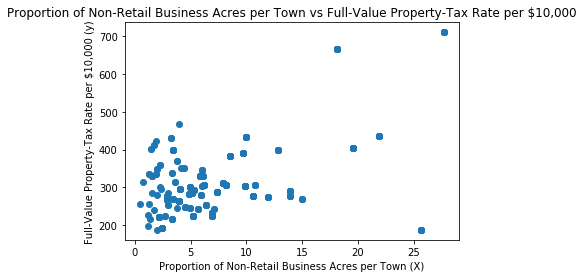

In [5]:
# TODO: display plot 
plt.scatter(X, y)

# TODO: labels and title
plt.title('Proportion of Non-Retail Business Acres per Town vs Full-Value Property-Tax Rate per $10,000')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (X)')
plt.ylabel('Full-Value Property-Tax Rate per $10,000 (y)')


plt.show()

TODO: What do you notice about the relationship between the variables? 

A: The variables are clustered near the origin and most of the data follows a line of y=mX+c with a positive slope. The data can be fitted with a linear function, but the performance metrics might not be high because some of the data is very scattered.
The correlation might be around +0.5.

Next, find the coefficients. The values for $\beta_0$ and $\beta_1$ are given by the following equations, where $n$ is the total number of values. This derivation was done in class. 


$$\beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$


$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

In [6]:
# TODO: implement function 
def get_coeffs(X, y):
    '''
    Params:
        X: the X vector
        y: the y vector
    Returns:
        a tuple (b0, b1)
    '''

    numr = 0
    demr = 0
    for i in range(data_len):
        numr += (X[i] - mean_X)*(y[i] - mean_y)
        demr += (X[i] - mean_X)**2
    beta_1 = numr/demr
    beta_0 = mean_y - beta_1*mean_X
    
    beta =[beta_0, beta_1]
    return beta
   # raise NotImplementedError

In [7]:
# run cell to call function and display the regression line
# the values are rounded for display convenience 
b0, b1 = get_coeffs(X, y)
print("Regression line: TAX = " + str(round(b0)) + " + " + str(round(b1)) +"*INDUS")

Regression line: TAX = 211.0 + 18.0*INDUS


Plot the regression line overlayed on the real y-values. 

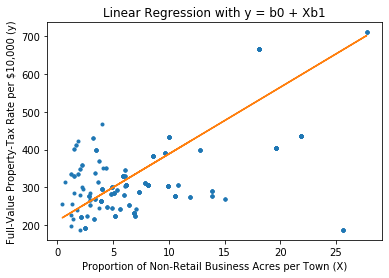

In [8]:

# TODO: plot y-values 
plt.plot(X, y, '.')


# TODO: plot regression line
plt.plot(X, b0 + b1*X, '-')

# TODO: labels and title
plt.title('Linear Regression with y = b0 + Xb1')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (X)')
plt.ylabel('Full-Value Property-Tax Rate per $10,000 (y)')

plt.show()

The line appears to fit the data, but first, let us find the RSS to evaluate this model. The RSS is used to measure the amount of variance in the data set that is not explained by the regression model. Recall that
$$RSS = \sum_{i =1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2$$

In [9]:
# TODO: implement function
def get_RSS(b0, b1, X, y):
    '''
    Params: 
        b0: beta 0
        b1: beta 1
        X: X vector
        y: y vector
    Returns:
        residual sum of squares (RSS) 
    '''
    RSS = 0
    for i in range(data_len):
        RSS += (y[i] - (b0 + b1*X[i]))**2
    
    return RSS
    #raise NotImplementedError

In [10]:
# run this cell to print RSS
print("RSS:", get_RSS(b0, b1, X, y))

RSS: 6892554.224031512


We can also evaluate the model through the Root Mean Squared Error (RMSE) and the Coefficient of Determination ($R^2$ score). 
- The RMSE is similar to the RSS, but provides a value with more interpretable units -- in our case, tax rate per 10,000 dollars.  
- The $R^2$ value represents the proportion of the variance for the dependent variable that is explained by the independent variable. 

Use the following equations to find the RMSE and $R^2$ score:

$$ RMSE = \sqrt(\sum_{i=1}^{n} \frac{1}{n} (\hat{y_i} - y_i)^2 )$$

$$ R^2 = 1 - \frac{SS_r}{SS_t} $$ where

$$SS_t = \sum_{i = 1}^{n} (y_i - \bar{y})^2$$

and

$$SS_r = \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$



In [11]:
# TODO: implement function
def get_RMSE(b0, b1, X, y):
    '''
    Params: 
        b0: beta 0
        b1: beta 1
        X: X vectore
        y: y vector
    Returns:
        rmse 
    '''
    RMSE = 0
    for i in range(data_len):
        RMSE += mth.sqrt((1/data_len)*((b0 + b1*X[i]) - y[i])**2)
        
    return RMSE
    #raise NotImplementedError

In [12]:
# run cell to print RMSE
print("RMSE: ", get_RMSE(b0, b1, X, y))

RMSE:  2072.529171157719


In [13]:
# TODO: implement function
def get_R2(b0, b1, X, y):
    '''
    Params: 
        b0: beta 0
        b1: beta 1
        X: X vector
        y: y vector
    Returns:
        r2 score
    '''
    
    SSR = 0
    SST = 0
    
    for i in range(data_len):
        SST += (y[i] - mean_y)**2
        SSR += (y[i] - (b0 + b1*X[i]))**2
        
    R2 = 1 - SSR/SST
    
    return R2
        
   # raise NotImplementedError

In [14]:
# run cell to print RMSE
print("R2: ", get_R2(b0, b1, X, y))

R2:  0.5194952370037837


TODO: Analyze what the above $R^2$ score indicates about the model. 

A: An R^2 score measures how close the data is to the regression line. 
The above R^2 score of 0.5194952370037837 indicates that the model can explain the variation with an accuracy of approximately 51.9%. So, the data points are not really close to the regression line, but not very far too (as the value of R^2 is around 0.5).

Now, we will compare the above results with the results from using scikit-learn, a machine learning library in Python. Read the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn how to use this library. Return the $R^2$ score and RMSE. 

In [15]:
# TODO: scikit learn function
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def linear_regression_SKL(X, y):
    '''
    Params:
        X: X vector
        y: y vector
    Returns:
        rmse and r2 as a tuple
    '''
    X_array = X.values.reshape(-1,1)
    y_array = y.values

    X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.20)
    
    model = LinearRegression().fit(X_train, y_train) #to calculate optimal values of b0 and b1

        
    y_pred = model.predict(X_test)
    
    R2_score = model.score(X_test, y_test)

    RMSE_score = mean_squared_error(y_test, y_pred)


    return [R2_score, RMSE_score]
    
   # raise NotImplementedError

In [16]:
# run this cell to print results from SKL LR
R2_score, RMSE_score = linear_regression_SKL(X, y)
   
print('Coefficient of Determination (R2): ', R2_score)

print('RMSE: ', RMSE_score)
    
    

Coefficient of Determination (R2):  0.599340062672759
RMSE:  11546.640915698801


TODO: Analyze the results and compare the RMSE and $R^2$ to the previous method.

A: For the scikit-learn regression model, the data was split into training (80%) and test data (20%).

The R^2 score obtained on the test data usually seems to lie between 0.4 and 0.6. This is in accordance with the R^2 value obtained in the previous method. Here, the R2 value varies with each iteration because the split of the data is random.

The RMSE obtained in this method usually lies between 11,000 and 17,000. This is very much different to the RMSE value obtained in the previous method. This is because of the split. In the previous method, the training data was used for the RMSE function, which in turn gave a low RMSE. Here, only the test data was used. Hence, the high RMSE.

The lower the value of RMSE and the higher the value of the R2, the better the model.